# Cross-task evaluation plots

This notebook loads the cross-task evaluation JSON files for the three source directions (programming, chess, arithmetic-base8) and plots their curves per target task. Figures are saved to `notebooks/outputs/cross_task_plots/`.


In [ ]:
from pathlib import Path

json_paths = {
    'programming': '/home/ljilesen/interaction-experiment/outputs/optimal_directions/cross_task_eval_programming.json',
    'chess': '/home/ljilesen/interaction-experiment/outputs/optimal_directions/cross_task_eval_chess.json',
    'arithmetic-base8': '/home/ljilesen/interaction-experiment/outputs/optimal_directions/cross_task_eval_arithmetic-base8.json',
    'combined_balanced': '/home/ljilesen/interaction-experiment/outputs/optimal_directions/cross_task_eval_combined_balanced.json',
}
out_dir = Path('/home/ljilesen/interaction-experiment/notebooks/outputs/cross_task_plots')

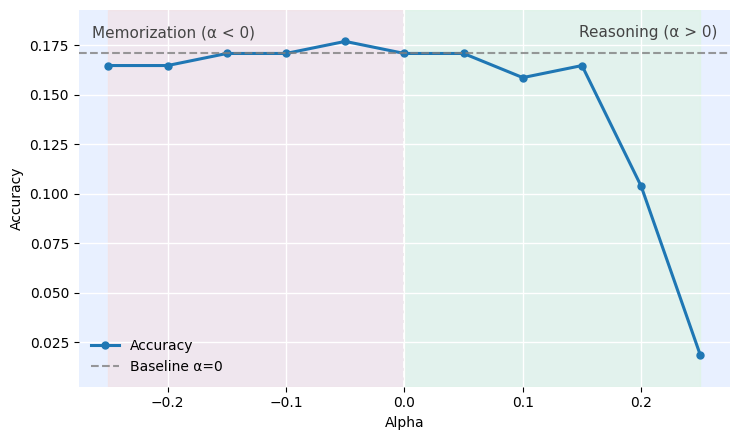

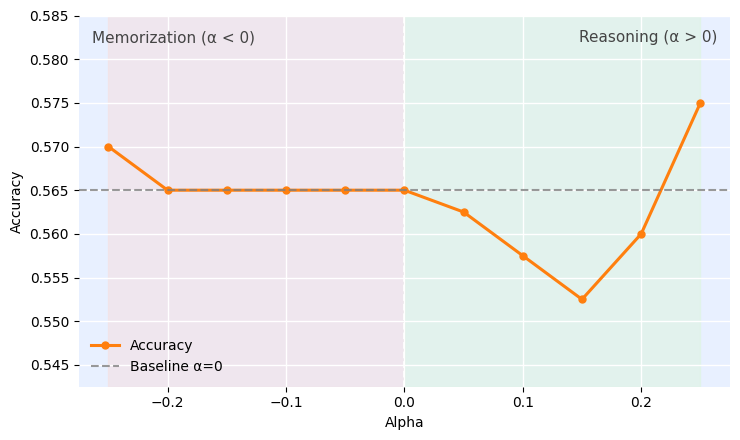

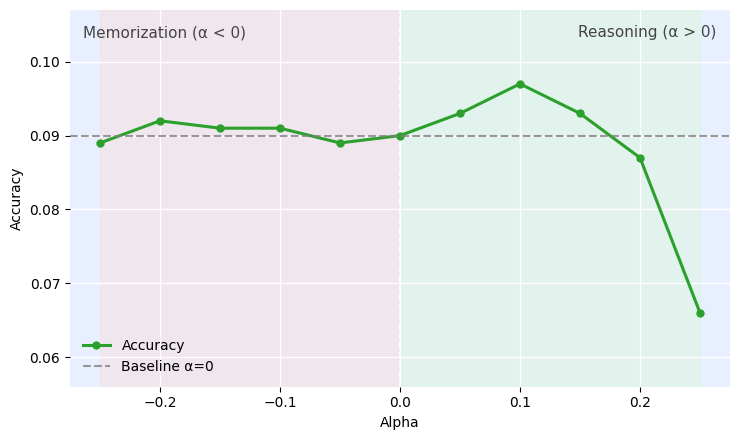

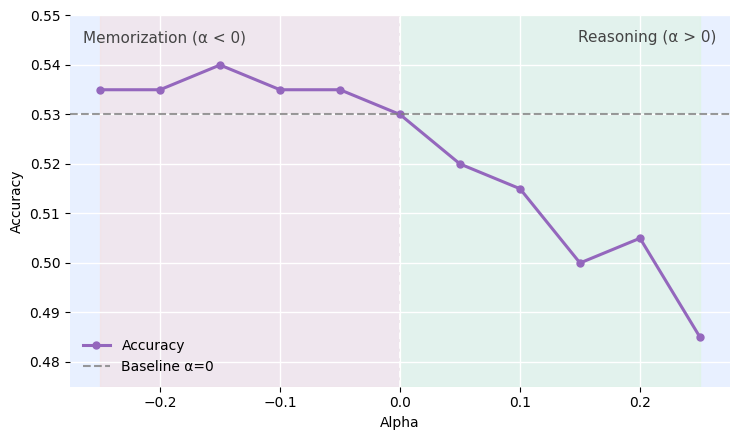

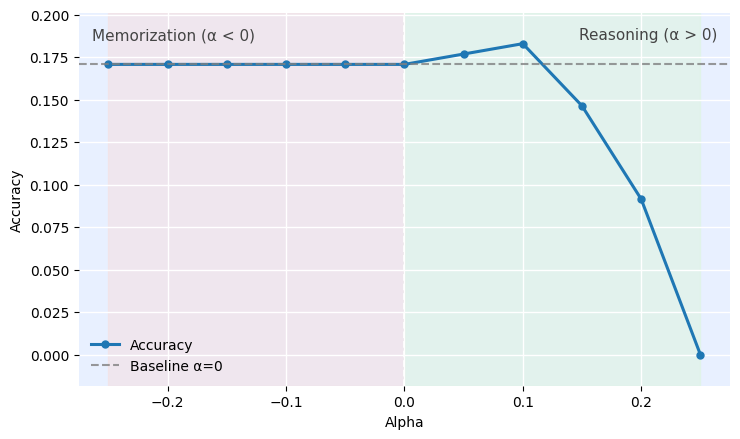

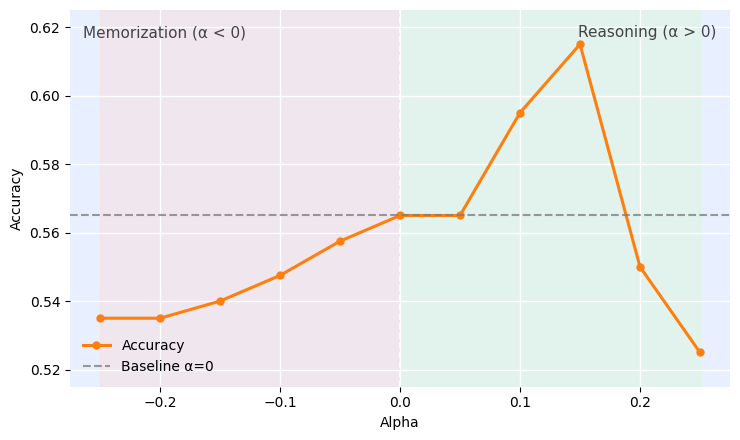

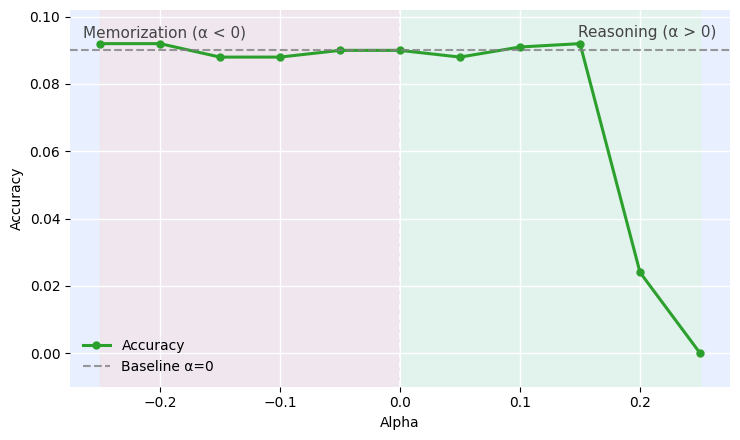

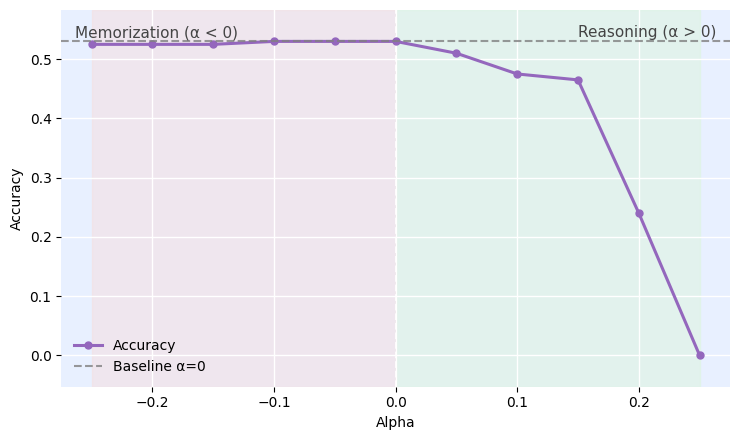

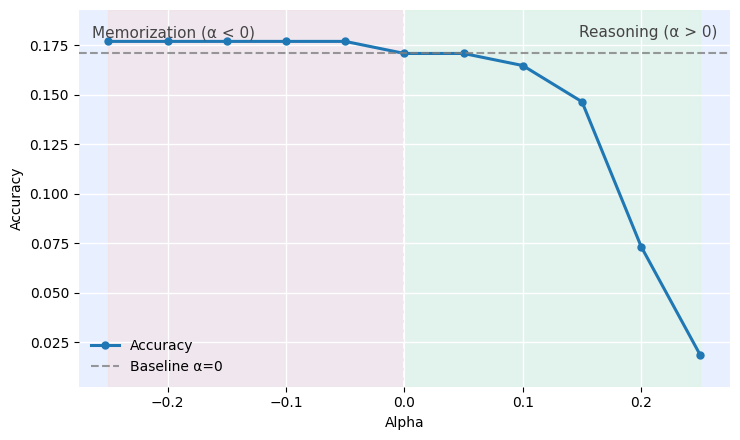

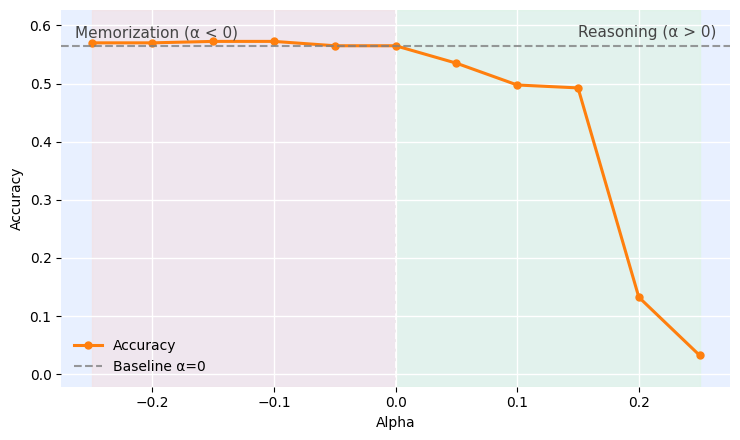

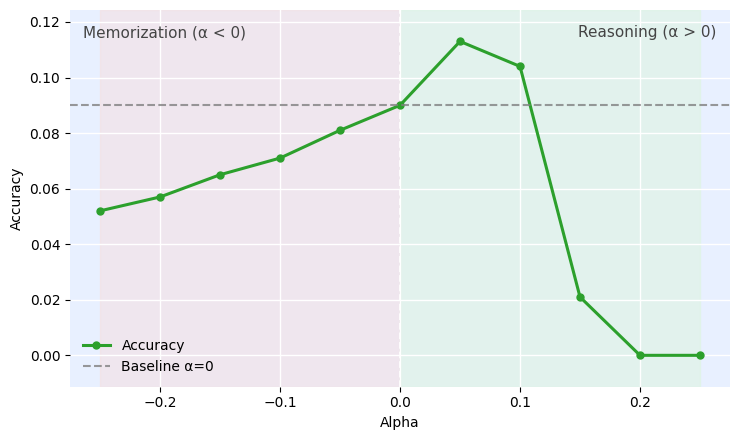

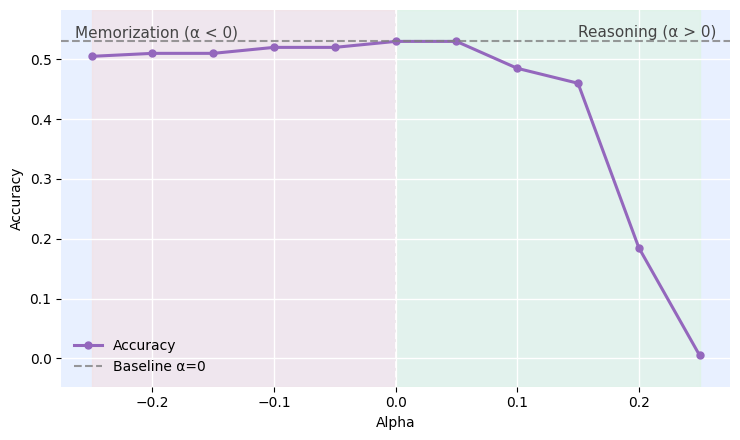

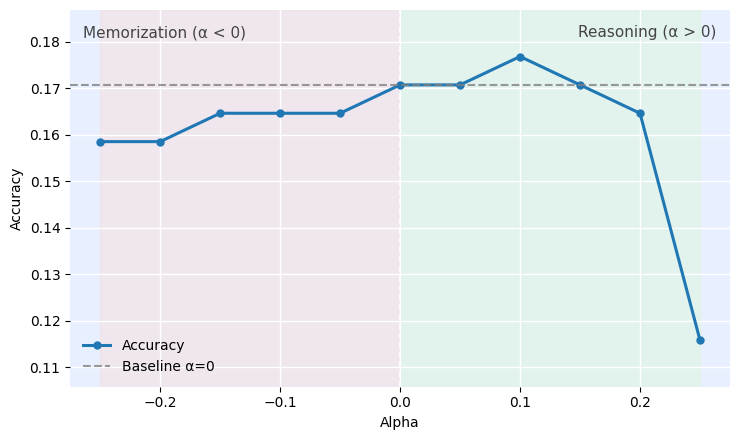

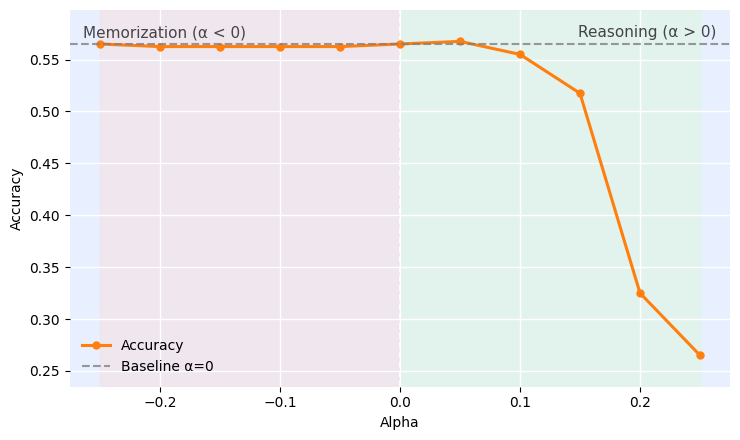

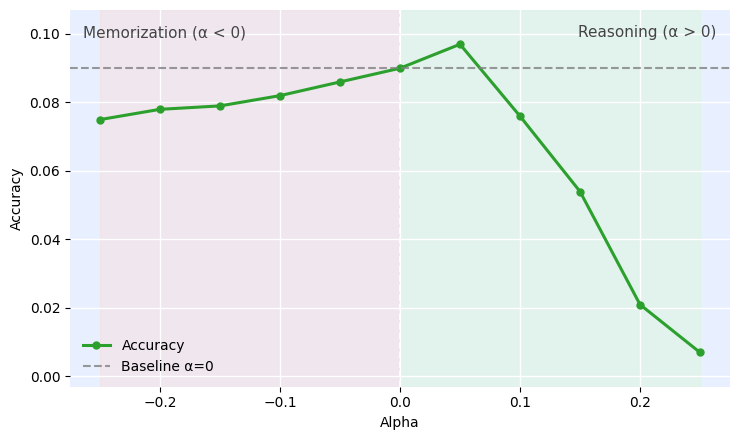

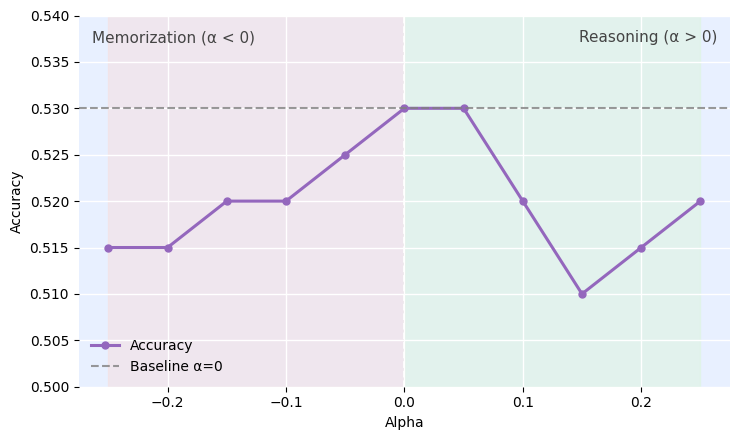

Saved per-direction alpha plots to: /home/ljilesen/interaction-experiment/notebooks/outputs/cross_task_plots


In [5]:
# Plot task accuracy vs alpha per source direction with light-blue grid style
import json
from pathlib import Path
import matplotlib.pyplot as plt

light_blue = '#e8f0ff'


source_names = ['programming', 'chess', 'arithmetic-base8', 'combined_balanced']
name_map = {
    'programming': 'Programming',
    'chess': 'Chess',
    'arithmetic-base8': 'Arithmetic (base 8)',
    'combined_balanced': 'Combined (balanced)',
}
_extract_xy_simple = lambda tasks: (
    [float(a) for a, _ in sorted(((float(a), float(v)) for a, v in tasks.items()), key=lambda t: t[0])],
    [float(v) for _, v in sorted(((float(a), float(v)) for a, v in tasks.items()), key=lambda t: t[0])]
)
task_plot_meta = {
    'programming': {
        'title': 'Programming: accuracy vs alpha',
        'ylabel': 'Accuracy',
        'extract': lambda tasks: (
            [float(a) for a, _ in sorted(((float(a), float(v['pass@1'])) for a, v in tasks['programming'].items()), key=lambda t: t[0])],
            [float(v) for _, v in sorted(((float(a), float(v['pass@1'])) for a, v in tasks['programming'].items()), key=lambda t: t[0])]
        )
    },
    'chess': {
        'title': 'Chess: accuracy vs alpha',
        'ylabel': 'Accuracy',
        'extract': lambda tasks: (
            [float(a) for a, _ in sorted(((float(a), float(v['counter_factual'])) for a, v in tasks['chess'].items()), key=lambda t: t[0])],
            [float(v) for _, v in sorted(((float(a), float(v['counter_factual'])) for a, v in tasks['chess'].items()), key=lambda t: t[0])]
        )
    },
    'arithmetic': {
        'title': 'Arithmetic: accuracy vs alpha',
        'ylabel': 'Accuracy',
        'extract': lambda tasks: _extract_xy_simple(tasks['arithmetic'])
    },
    'gsm_symbolic': {
        'title': 'GSM-symbolic: accuracy vs alpha',
        'ylabel': 'Accuracy',
        'extract': lambda tasks: _extract_xy_simple(tasks['gsm_symbolic'])
    }
}

palette = {
    'programming': '#1f77b4',
    'chess': '#ff7f0e',
    'arithmetic': '#2ca02c',
    'gsm_symbolic': '#9467bd',
}

for source in source_names:
    # Load per-source JSON
    with open(json_paths[source], 'r') as f:
        data = json.load(f)
    tasks = data['results'][source]['tasks']

    # Output dir per direction
    per_dir_out = out_dir / source
    per_dir_out.mkdir(parents=True, exist_ok=True)

    # Plot each target task
    for task_key in ['programming', 'chess', 'arithmetic', 'gsm_symbolic']:
        xs, ys = task_plot_meta[task_key]['extract'](tasks)
        fig, ax = plt.subplots(figsize=(7.5, 4.5))
        fig.patch.set_facecolor('white')
        ax.set_facecolor(light_blue)

        # Determine x-range for regime shading
        if len(xs) > 0:
            xmin, xmax = min(xs), max(xs)
            # Memorization (alpha < 0)
            if xmin < 0:
                ax.axvspan(xmin, 0, color='#f7dede', alpha=0.5, zorder=0)
            # Reasoning (alpha > 0)
            if xmax > 0:
                ax.axvspan(0, xmax, color='#ddf5dd', alpha=0.5, zorder=0)
            # Vertical separator at alpha=0
            ax.axvline(0, color='white', linestyle='--', linewidth=1.3, zorder=1)

        # Plot accuracy curve
        ax.plot(xs, ys, color=palette[task_key], marker='o', markersize=5, linewidth=2.2, label='Accuracy')

        # Grid styling and spines
        ax.grid(True, color='white', linewidth=1.0)
        for spine in ax.spines.values():
            spine.set_visible(False)

        # Baseline at alpha=0
        baseline_y = None
        for x, y in zip(xs, ys):
            if x == 0:
                baseline_y = y
                break
        if baseline_y is not None:
            ax.axhline(y=baseline_y, color='gray', linestyle='--', alpha=0.8, linewidth=1.5, label='Baseline α=0')

        ax.set_xlabel('Alpha')
        ax.set_ylabel(task_plot_meta[task_key]['ylabel'])

        # Y-limits to give some headroom
        if len(ys) > 0:
            y_min = min(ys)
            y_max = max(ys)
            margin = max(0.01, (y_max - y_min) * 0.1)
            ax.set_ylim(y_min - margin, y_max + margin)

        # Region labels (using axes fraction coords so they stay at top corners)
        ax.text(0.02, 0.96, 'Memorization (α < 0)', transform=ax.transAxes, ha='left', va='top',
                fontsize=11, color='#444')
        ax.text(0.98, 0.96, 'Reasoning (α > 0)', transform=ax.transAxes, ha='right', va='top',
                fontsize=11, color='#444')

        ax.legend(loc='best', frameon=False)

        fig.tight_layout()
        save_path = per_dir_out / f"{task_key}_vs_alpha.png"
        fig.savefig(save_path, dpi=300, bbox_inches='tight', facecolor='white')
        plt.show()

print('Saved per-direction alpha plots to:', out_dir)


Alpha: -0.25, Real-world accuracy: 0.756, Counterfactual accuracy: 0.052
Alpha: -0.20, Real-world accuracy: 0.752, Counterfactual accuracy: 0.057
Alpha: -0.15, Real-world accuracy: 0.747, Counterfactual accuracy: 0.065
Alpha: -0.10, Real-world accuracy: 0.744, Counterfactual accuracy: 0.071
Alpha: -0.05, Real-world accuracy: 0.73, Counterfactual accuracy: 0.081
Alpha: 0.00, Real-world accuracy: 0.709, Counterfactual accuracy: 0.09
Alpha: 0.05, Real-world accuracy: 0.68, Counterfactual accuracy: 0.113
Alpha: 0.10, Real-world accuracy: 0.603, Counterfactual accuracy: 0.104
Alpha: 0.15, Real-world accuracy: 0.285, Counterfactual accuracy: 0.021
Alpha: 0.20, Real-world accuracy: 0.001, Counterfactual accuracy: 0.0
Alpha: 0.25, Real-world accuracy: 0.0, Counterfactual accuracy: 0.0


NameError: name 'out_dir' is not defined

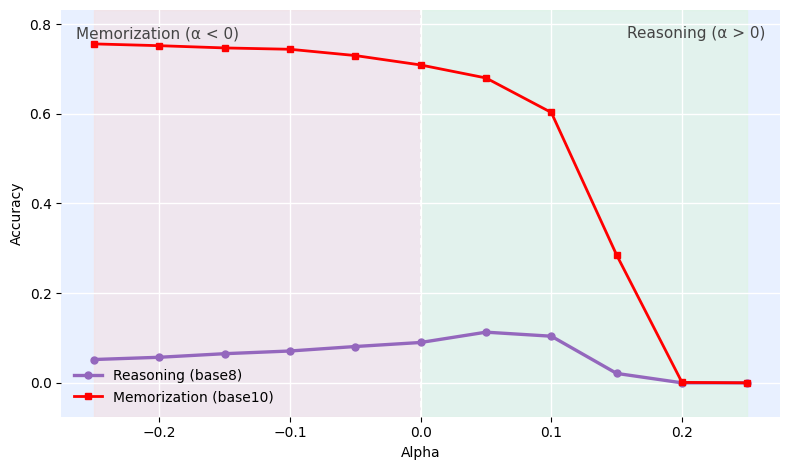

In [9]:

# Arithmetic task: Real-world (memorization) vs Counterfactual (reasoning) accuracy vs alpha
import json

light_blue = '#e8f0ff'

# Load arithmetic results that include both real_world and counterfactual
arith_results_path = "/home/ljilesen/interaction-experiment/outputs/arithmetic-base8/tuning/counter_factual/optimal_sweep_indices_14991947.json"
with open(arith_results_path, 'r') as f:
    arith_data = json.load(f)
# Helper to parse alpha keys like 'alpha-0.05', 'alpha0.0', 'alpha0.10'
def _parse_alpha_key(k: str) -> float:
    return float(k)
# Navigate to arithmetic intervention; pick the available layer key
results = []
for key in arith_data['indices_by_alpha'].keys():
    counter_factual_indices = arith_data['indices_by_alpha'][key]['counter_factual_indices']
    real_world_indices = arith_data['indices_by_alpha'][key]['real_world_indices']
    real_world_accuracy = len(real_world_indices) / 1000
    counter_factual_accuracy = len(counter_factual_indices) / 1000
    print(f"Alpha: {key}, Real-world accuracy: {real_world_accuracy}, Counterfactual accuracy: {counter_factual_accuracy}")
    results.append((_parse_alpha_key(key), real_world_accuracy, counter_factual_accuracy))

results.sort(key=lambda t: t[0])


xs = [a for a, _, _ in results]
cf_ys = [float(v) for _, _, v in results]
rw_ys = [float(v) for _, v, _ in results]

plt

fig, ax = plt.subplots(figsize=(8, 4.8))
fig.patch.set_facecolor('white')
ax.set_facecolor(light_blue)

# Regime shading and separator
xmin, xmax = min(xs), max(xs)
if xmin < 0:
    ax.axvspan(xmin, 0, color='#f7dede', alpha=0.5, zorder=0)
if xmax > 0:
    ax.axvspan(0, xmax, color='#ddf5dd', alpha=0.5, zorder=0)
ax.axvline(0, color='white', linestyle='--', linewidth=1.3, zorder=1)

# Plot series
ax.plot(xs, cf_ys, color='#9467bd', marker='o', linewidth=2.4, markersize=5, label='Reasoning (base8)')
ax.plot(xs, rw_ys, color='red', marker='s', linewidth=2.0, markersize=5, label='Memorization (base10)')

# Grid and cosmetics
ax.grid(True, color='white', linewidth=1.0)
for spine in ax.spines.values():
    spine.set_visible(False)

ax.set_xlabel('Alpha')
ax.set_ylabel('Accuracy')
ax.text(0.02, 0.96, 'Memorization (α < 0)', transform=ax.transAxes, ha='left', va='top', fontsize=11, color='#444')
ax.text(0.98, 0.96, 'Reasoning (α > 0)', transform=ax.transAxes, ha='right', va='top', fontsize=11, color='#444')
ax.legend(loc='best', frameon=False)

# Y-limits with headroom
all_ys = [v for v in cf_ys + rw_ys if v == v]
if all_ys:
    y_min, y_max = min(all_ys), max(all_ys)
    margin = max(0.01, (y_max - y_min) * 0.1)
    ax.set_ylim(y_min - margin, y_max + margin)

fig.tight_layout()
arith_cmp_path = out_dir / 'arithmetic_memorization_vs_reasoning.png'
fig.savefig(arith_cmp_path, dpi=300, bbox_inches='tight', facecolor='white')
print('Saved:', arith_cmp_path)
plt.show()

Saved table to: /home/ljilesen/interaction-experiment/notebooks/outputs/cross_task_plots/cross_task_table_percent.png


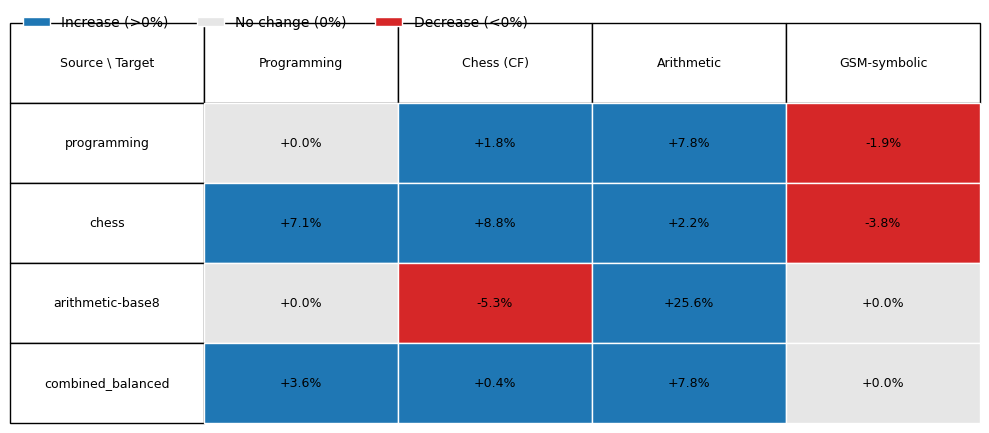

In [6]:
# Percentage change table (best α>0 vs α=0) with 3-color scheme
import numpy as np
import matplotlib.pyplot as plt

source_names = ['programming', 'chess', 'arithmetic-base8', 'combined_balanced']
col_keys = ['programming', 'chess', 'arithmetic', 'gsm_symbolic']
col_labels = ['Programming', 'Chess (CF)', 'Arithmetic', 'GSM-symbolic']

# Helper to compute percent change relative to baseline (α=0)
def _best_vs_baseline_percent(xs, ys):
    if not xs:
        return 0.0
    baseline = None
    best_pos = None
    for x, y in zip(xs, ys):
        if abs(x) < 1e-12:
            baseline = y
    for x, y in zip(xs, ys):
        if x > 0 and (best_pos is None or y > best_pos):
            best_pos = y
    if baseline is None or best_pos is None or baseline == 0:
        return 0.0
    return (best_pos - baseline) / baseline * 100.0

# Build matrix of percent changes
matrix = np.zeros((len(source_names), len(col_keys)), dtype=float)
for i, source in enumerate(source_names):
    with open(json_paths[source], 'r') as f:
        data = json.load(f)
    tasks = data['results'][source]['tasks']

    # Programming (pass@1)
    prog_items = sorted(((float(a), float(v['pass@1'])) for a, v in tasks['programming'].items()), key=lambda t: t[0])
    xs = [a for a, _ in prog_items]
    ys = [b for _, b in prog_items]
    matrix[i, 0] = _best_vs_baseline_percent(xs, ys)

    # Chess (counter_factual)
    chess_items = sorted(((float(a), float(v['counter_factual'])) for a, v in tasks['chess'].items()), key=lambda t: t[0])
    xs = [a for a, _ in chess_items]
    ys = [b for _, b in chess_items]
    matrix[i, 1] = _best_vs_baseline_percent(xs, ys)

    # Arithmetic
    xs, ys = _extract_xy_simple(tasks['arithmetic'])
    matrix[i, 2] = _best_vs_baseline_percent(xs, ys)

    # GSM-symbolic
    xs, ys = _extract_xy_simple(tasks['gsm_symbolic'])
    matrix[i, 3] = _best_vs_baseline_percent(xs, ys)

# Color mapping: blue for increase (>0), red for decrease (<0), light grey for ~0
inc_color = '#1f77b4'
dec_color = '#d62728'
neu_color = '#e6e6e6'

cell_text = [[f"{v:+.1f}%" for v in row] for row in matrix]
cell_colors = [[inc_color if v > 0.0 else dec_color if v < 0.0 else neu_color for v in row] for row in matrix]

fig, ax = plt.subplots(figsize=(10, 2 + 0.6 * len(source_names)))
fig.patch.set_facecolor('white')
ax.axis('off')

# Build table
from matplotlib.table import Table

tbl = Table(ax, bbox=[0, 0, 1, 1])

n_rows, n_cols = matrix.shape
row_height = 1.0 / (n_rows + 1)
col_width = 1.0 / (n_cols + 1)

# Header row
for j, label in enumerate(['Source \\ Target'] + col_labels):
    tbl.add_cell(0, j, width=col_width, height=row_height, text=label, loc='center', facecolor='white')

# Data rows
for i, src in enumerate(source_names, start=1):
    # Row header
    tbl.add_cell(i, 0, width=col_width, height=row_height, text=src, loc='center', facecolor='white')
    for j in range(n_cols):
        tbl.add_cell(i, j + 1, width=col_width, height=row_height, text=cell_text[i - 1][j],
                     loc='center', facecolor=cell_colors[i - 1][j], edgecolor='white')

ax.add_table(tbl)

# Legend
from matplotlib.patches import Patch
legend_elems = [
    Patch(facecolor=inc_color, edgecolor='white', label='Increase (>0%)'),
    Patch(facecolor=neu_color, edgecolor='white', label='No change (0%)'),
    Patch(facecolor=dec_color, edgecolor='white', label='Decrease (<0%)'),
]
ax.legend(handles=legend_elems, loc='upper left', bbox_to_anchor=(0, 1.05), ncol=3, frameon=False)

fig.tight_layout()
save_path = out_dir / 'cross_task_table_percent.png'
fig.savefig(save_path, dpi=300, bbox_inches='tight', facecolor='white')
print('Saved table to:', save_path)
plt.show()


In [12]:
# Build DataFrame of percentage point (pp) increases: best α>0 vs α=0
import json
import numpy as np
import pandas as pd
from pathlib import Path

# Ensure paths dict exists (fallback if running cell standalone)
if 'json_paths' not in globals():
    json_paths = {
        'programming': '/home/ljilesen/interaction-experiment/outputs/optimal_directions/cross_task_eval_programming.json',
        'chess': '/home/ljilesen/interaction-experiment/outputs/optimal_directions/cross_task_eval_chess.json',
        'arithmetic-base8': '/home/ljilesen/interaction-experiment/outputs/optimal_directions/cross_task_eval_arithmetic-base8.json',
        'combined_balanced': '/home/ljilesen/interaction-experiment/outputs/optimal_directions/cross_task_eval_combined_balanced.json',
    }

# Display names for rows and columns
source_keys = ['programming', 'chess', 'arithmetic-base8', 'combined_balanced']
source_display = ['Programming', 'Chess', 'Arithmetic (base 8)', 'Combined']
col_keys = ['programming', 'chess', 'arithmetic', 'gsm_symbolic']
col_labels = ['Programming', 'Chess', 'Arithmetic (base 8)', 'GSM-symbolic']

# Helper to compute percentage point change (best α>0 minus α=0), scaled by 100

def _pp_change_best_vs_baseline(xs, ys):
    if not xs:
        return np.nan
    baseline = None
    for x, y in zip(xs, ys):
        if abs(x) < 1e-12:
            baseline = y
            break
    if baseline is None:
        return np.nan
    best_pos = None
    for x, y in zip(xs, ys):
        if x > 0 and (best_pos is None or y > best_pos):
            best_pos = y
    if best_pos is None:
        return 0.0
    return float((best_pos - baseline) * 100.0)

# Simple extractor for scalar targets stored as {alpha_str: float}

def _extract_xy_simple(alpha_map):
    items = sorted(((float(a), float(v)) for a, v in alpha_map.items()), key=lambda t: t[0])
    return [a for a, _ in items], [b for _, b in items]

rows = []
for src in source_keys:
    with open(json_paths[src], 'r') as f:
        data = json.load(f)
    tasks = data['results'][src]['tasks']

    # Programming: use pass@1
    prog_items = sorted(((float(a), float(v['pass@1'])) for a, v in tasks['programming'].items()), key=lambda t: t[0])
    prog_pp = _pp_change_best_vs_baseline([a for a, _ in prog_items], [b for _, b in prog_items])

    # Chess: use counter_factual accuracy
    chess_items = sorted(((float(a), float(v['counter_factual'])) for a, v in tasks['chess'].items()), key=lambda t: t[0])
    chess_pp = _pp_change_best_vs_baseline([a for a, _ in chess_items], [b for _, b in chess_items])

    # Arithmetic: scalar
    ax, ay = _extract_xy_simple(tasks['arithmetic'])
    arith_pp = _pp_change_best_vs_baseline(ax, ay)

    # GSM-symbolic: scalar
    gx, gy = _extract_xy_simple(tasks['gsm_symbolic'])
    gsm_pp = _pp_change_best_vs_baseline(gx, gy)

    rows.append([prog_pp, chess_pp, arith_pp, gsm_pp])

# Create DataFrame
_df = pd.DataFrame(rows, index=source_display, columns=col_labels)
# Round to one decimal place for display (still numeric)
df = _df.round(1)
print(df)



                     Programming  Chess  Arithmetic (base 8)  GSM-symbolic
Programming                  0.0    1.0                  0.7          -1.0
Chess                        1.2    5.0                  0.2          -2.0
Arithmetic (base 8)          0.0   -3.0                  2.3           0.0
Combined                     0.6    0.3                  0.7           0.0


Saved heatmap to: /home/ljilesen/interaction-experiment/notebooks/outputs/cross_task_plots/cross_task_table_points_heatmap.png


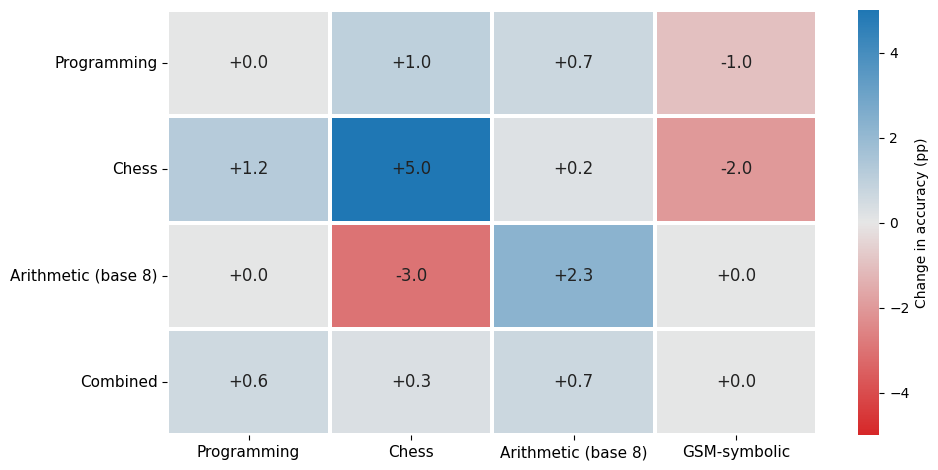

In [13]:
# Heatmap version of the percentage point change table
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

# Ensure df from previous cell exists: rows=source_display, cols=col_labels, values=pp-change
assert 'df' in globals(), 'Run the previous cell to build df first.'

# Colormap: red (decrease) -> light grey (no change) -> blue (increase)
inc_color = '#1f77b4'
dec_color = '#d62728'
neu_color = '#e6e6e6'
cmap = LinearSegmentedColormap.from_list('inc_neu_dec', [dec_color, neu_color, inc_color], N=256)

vmax = float(np.nanmax(np.abs(df.values))) if df.size else 1.0

fig, ax = plt.subplots(figsize=(10, 2 + 0.7 * len(df)))
fig.patch.set_facecolor('white')

sns.heatmap(
    df,
    ax=ax,
    cmap=cmap,
    vmin=-vmax,
    vmax=vmax,
    center=0,
    annot=True,
    fmt='+.1f',
    annot_kws={'fontsize': 12, 'color': '#222'},
    linewidths=1.5,
    linecolor='white',
    cbar_kws={'label': 'Change in accuracy (pp)'},
)

ax.tick_params(labelsize=11)
ax.set_xlabel('')
ax.set_ylabel('')

plt.tight_layout()
heatmap_path = out_dir / 'cross_task_table_points_heatmap.png'
fig.savefig(heatmap_path, dpi=300, bbox_inches='tight', facecolor='white')
print('Saved heatmap to:', heatmap_path)
plt.show()
